In [5]:
#PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim

#Other libraries
import numpy as np
from matplotlib import pyplot as plt
from adjustText import adjust_text
from sklearn.decomposition import PCA
import json

# Custom Python files
from hero2vec import *

# Hero2vec Training

In [2]:
h2v = Hero2vecTrain(10)

loss = test.train()

epoch: 0, loss: 4.726, validation loss: 4.514
epoch: 10, loss: 3.950, validation loss: 4.033
epoch: 20, loss: 3.865, validation loss: 3.993
epoch: 30, loss: 3.827, validation loss: 3.974
epoch: 40, loss: 3.807, validation loss: 3.965
epoch: 50, loss: 3.795, validation loss: 3.962
epoch: 60, loss: 3.789, validation loss: 3.943
epoch: 70, loss: 3.786, validation loss: 3.942
epoch: 80, loss: 3.784, validation loss: 3.945
epoch: 90, loss: 3.784, validation loss: 3.942


In [31]:
#Save the model
h2v.save_model('./heor2vec_model.pt')

/home/hkb/anaconda3/envs/MNIST/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type Hero2vecNetwork. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [3]:
embeddings = h2v.model.hero_embedding.weight.cpu().data.numpy()

In [28]:
#Save the embeddings
h2v.save_embeddings('./hero_embeddings.txt')

# Loss vs Epochs

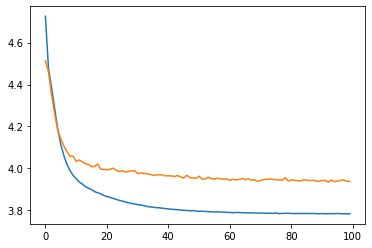

In [6]:
plt.figure(0)
plt.plot(loss['train_loss'], label='train')
plt.plot(loss['val_loss'], label='validation')
plt.show()

# Hero Embeddings Visualization

In [11]:
#Load the trained embeddings if needed.
embeddings = np.loadtxt('./hero_embeddings.txt')

In [12]:
pca_embeddings = PCA(2).fit_transform(embeddings)

In [8]:
#Match the hero index with names
with open('./heroes.json', 'r') as hero_file:
    heroes = json.load(hero_file)

ind2name = {}
hero_ind_list = []
hero_name_list = []
for h in heroes:
    ind2name[h['id']-1] = h['localized_name']
    hero_ind_list.append(h['id']-1)
    hero_name_list.append(h['localized_name'])

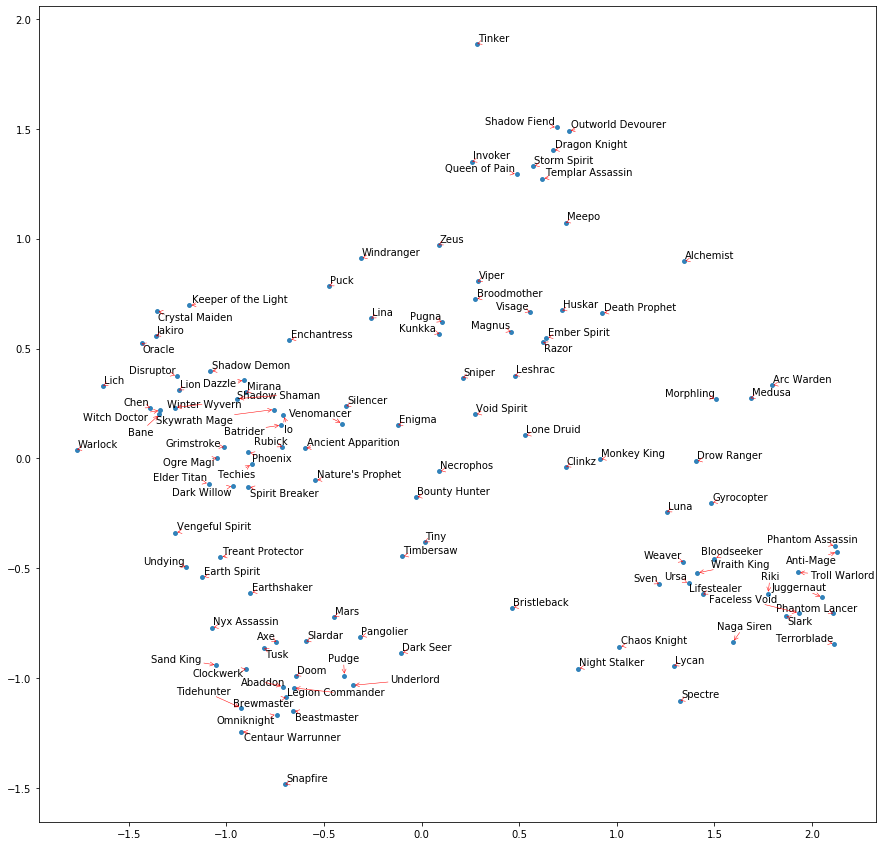

In [13]:
plt.figure(1,figsize=(15,15))
plt.scatter(pca_embeddings[hero_ind_list, 0], pca_embeddings[hero_ind_list, 1], s=15, alpha=0.9, marker='o')

texts = []
for x,y,s in zip(pca_embeddings[hero_ind_list, 0], pca_embeddings[hero_ind_list, 1], hero_name_list):
    texts.append(plt.text(x,y,s))
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
    
plt.show()